In [50]:
import pandas as pd
import matplotlib.pyplot as plt
#import geopandas as gpd
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [51]:
data = pd.read_csv('../data/data18sept.csv',parse_dates = [6])
#data.disponibilidad.fillna(0,inplace=True)
data.head()

,Unnamed: 0,X,Y,NOMBRE,NRO_EST,disponibilidad,fecha
0,0,-58.392452,-34.583133,FACULTAD DE DERECHO,1,0.0,2017-09-18 00:12:24.031035
1,1,-58.392452,-34.583133,FACULTAD DE DERECHO,1,0.0,2017-09-18 00:28:17.550805
2,2,-58.392452,-34.583133,FACULTAD DE DERECHO,1,0.0,2017-09-18 00:43:59.205273
3,3,-58.392452,-34.583133,FACULTAD DE DERECHO,1,0.0,2017-09-18 00:59:59.354992
4,4,-58.392452,-34.583133,FACULTAD DE DERECHO,1,0.0,2017-09-18 01:15:54.219349


In [52]:
data['fecha2'] = data.fecha.map(lambda x: x.hour + x.minute /600.)
#data['disp2'] = data.disponibilidad.map(int)
data['fecha']=[i.strftime('%H:%M') for i in data.fecha]

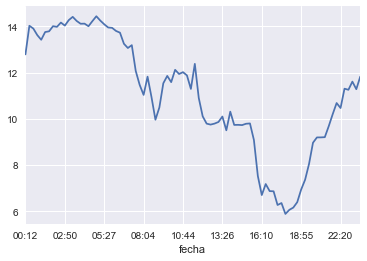

In [53]:
data.groupby(by='fecha').mean()['disponibilidad'].plot()

In [54]:
data.disponibilidad.describe()

count    13594.000000
mean        11.054569
std         16.706078
min          0.000000
25%          0.000000
50%          5.263158
75%         15.000000
max        100.000000
Name: disponibilidad, dtype: float64

In [55]:
#ax = sns.tsplot(time="fecha2", value="disponibilidad",unit="NRO_EST",data=data)

In [57]:
dataB = pd.read_csv('../data/estacionesConBarrios.csv')
dataB = dataB.loc[:,['NRO_EST','BARRIO','COMUNA']]
#dataB.NRO_EST = ['0' + str(i) if len(str(i)) == 1 else str(i) for i in dataB.NRO_EST]
dataB.head()

,NRO_EST,BARRIO,COMUNA
0,1,RECOLETA,2.0
1,2,RETIRO,1.0
2,3,MONSERRAT,1.0
3,4,SAN NICOLAS,1.0
4,6,SAN TELMO,1.0


In [58]:
data = data.merge(dataB)

In [59]:
data.BARRIO.unique()

array(['RECOLETA', 'RETIRO', 'MONSERRAT', 'SAN NICOLAS', 'SAN TELMO',
       'PALERMO', 'PUERTO MADERO', 'BALVANERA', 'ALMAGRO', 'COLEGIALES',
       'BOEDO', 'CABALLITO', 'PARQUE PATRICIOS', 'VILLA CRESPO',
       'CHACARITA', 'PARQUE CHACABUCO', 'SAN CRISTOBAL', 'BOCA',
       'BARRACAS', 'CONSTITUCION'], dtype=object)

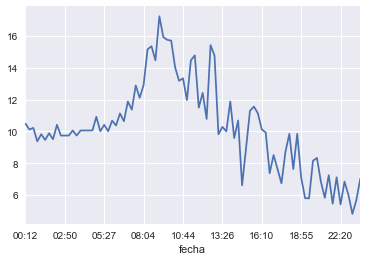

In [43]:
data[data.BARRIO=='RECOLETA'].groupby(by='fecha').mean()['disponibilidad'].plot()

In [71]:
data.COMUNA.unique()

array([  2.,   1.,  14.,   3.,   5.,  13.,   6.,   4.,  15.,   7.])

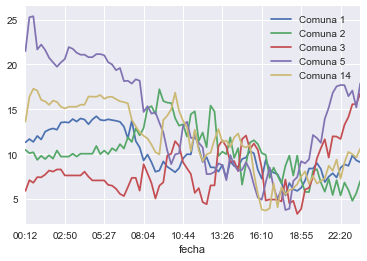

In [110]:
data[data.COMUNA==1].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 1')
data[data.COMUNA==2].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 2')
data[data.COMUNA==3].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 3')
data[data.COMUNA==5].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 5')
data[data.COMUNA==14].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 14')
plt.legend()

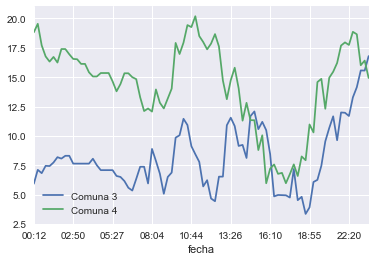

In [105]:
data[data.COMUNA==3].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 3')
data[data.COMUNA==4].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 4')
plt.legend()

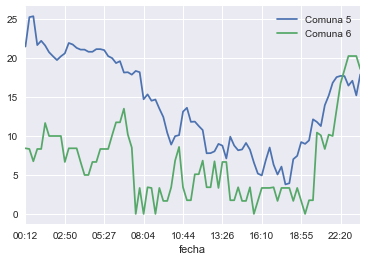

In [106]:
data[data.COMUNA==5].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 5')
data[data.COMUNA==6].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 6')
plt.legend()

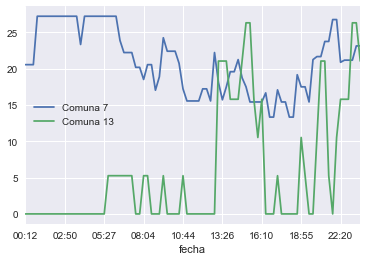

In [107]:
data[data.COMUNA==7].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 7')

data[data.COMUNA==13].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 13')
plt.legend()

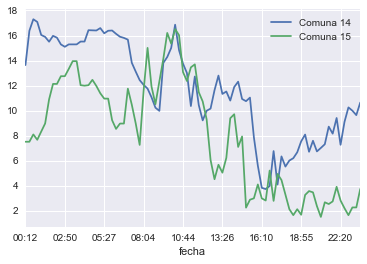

In [108]:
data[data.COMUNA==14].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 14')
data[data.COMUNA==15].groupby(by='fecha').mean()['disponibilidad'].plot(label='Comuna 15')
plt.legend()

In [112]:
viajes = pd.read_csv('../data/recorridos-realizados-2017.csv',sep=';')
viajes.head()

C:\Users\fgonzalez\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,3,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PERIODO,ID_USUARIO,FECHA_HORA_RETIRO,ORIGEN_ESTACION,NOMBRE_ORIGEN,DESTINO_ESTACION,NOMBRE_DESTINO,TIEMPO_USO,FECHA_CREACION,SEXO,EDAD
0,201703,246996,31/03/2017 22:28,9,PARQUE LAS HERAS,94,GUZ,,,,
1,201705,276216,2/05/2017 00:26,166,CEMENTERIO DE LA RECOLETA,83,PARANA,0H 10MIN 0SEG,,,
2,201705,144366,2/05/2017 16:30,108,USINA DEL ARTE,6,PARQUE LEZAMA,0H 10MIN 0SEG,,,
3,201705,53298,2/05/2017 21:24,154,GALLO,17,PLAZA ALMAGRO,0H 10MIN 0SEG,1/11/2012,,
4,201705,1255,3/05/2017 09:14,1,FACULTAD DE DERECHO,114,DELLA PAOLERA,0H 10MIN 0SEG,10/12/2010,,


In [113]:
viajes.PERIODO.unique()

array([201703, 201705, 201701, 201702, 201704, 201706, 201707, 201708], dtype=int64)